In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

import scipy as sp
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [4]:
p_data_nocharge = sp.sparse.load_npz('/home/taylor/Documents/independent-research/data/20x20x20/pDisc_40000_nocharge.npz')
C_data_nocharge = sp.sparse.load_npz('/home/taylor/Documents/independent-research/data/20x20x20/CDisc_40000_nocharge.npz')


p_data_charge = sp.sparse.load_npz('/home/taylor/Documents/independent-research/data/20x20x20/pDisc_40000_charge.npz')
C_data_charge = sp.sparse.load_npz('/home/taylor/Documents/independent-research/data/20x20x20/CDisc_40000_charge.npz')

#same labels will work
p_labels = np.zeros((p_data_nocharge.shape[0],))
C_labels = np.ones((C_data_nocharge.shape[0],))

In [5]:
full_data_nocharge = sp.sparse.vstack([p_data_nocharge, C_data_nocharge], format='csr')
full_data_charge = sp.sparse.vstack([p_data_charge, C_data_charge], format='csr')

full_labels = np.hstack((p_labels, C_labels))
print(full_data_nocharge.shape)
print(full_data_charge.shape)

print(full_labels.shape)

(80002, 8000)
(80002, 8000)
(80002,)


In [6]:
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(full_data_nocharge, full_labels, test_size=0.25, random_state=42)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(full_data_charge, full_labels, test_size=0.25, random_state=42)

In [7]:
reg = 1
iterations = 1000
nc = LogisticRegression(C=reg, max_iter=iterations)
y_pred = nc.fit(X_train_nc, y_train_nc).predict(X_test_nc)

In [8]:
print("With regularization C=" + str(reg) + " precision: " + str(metrics.precision_score(y_test_nc, y_pred)))
print("With regularization C=" + str(reg) + " accuracy: " + str(metrics.accuracy_score(y_test_nc, y_pred)))
print(metrics.classification_report(y_test_nc, y_pred))

With regularization C=1 precision: 0.665347081569
With regularization C=1 accuracy: 0.6799160042
             precision    recall  f1-score   support

        0.0       0.70      0.64      0.67     10007
        1.0       0.67      0.72      0.69      9994

avg / total       0.68      0.68      0.68     20001



In [9]:
C_vals = [10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]
print(C_vals)

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]


In [10]:
precisions_nc = []
recalls_nc = []
f1s_nc = []

precisions_c = []
recalls_c = []
f1s_c = []

for c in C_vals:
    y_pred_nc = LogisticRegression(C=c, max_iter=iterations).fit(X_train_nc, y_train_nc).predict(X_test_nc)
    
    precisions_nc.append(metrics.precision_score(y_test_nc, y_pred_nc))
    recalls_nc.append(metrics.recall_score(y_test_nc, y_pred_nc))
    f1s_nc.append(metrics.f1_score(y_test_nc, y_pred_nc))
    
    y_pred_c = LogisticRegression(C=c, max_iter=iterations).fit(X_train_c, y_train_c).predict(X_test_c)
    
    precisions_c.append(metrics.precision_score(y_test_c, y_pred_c))
    recalls_c.append(metrics.recall_score(y_test_c, y_pred_c))
    f1s_c.append(metrics.f1_score(y_test_c, y_pred_c))

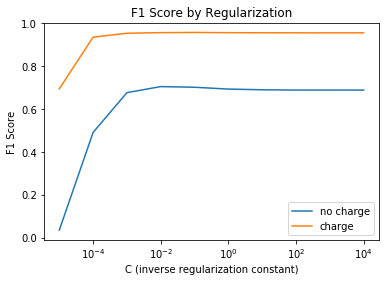

In [13]:
a = np.arange(len(C_vals))

plt.plot(C_vals, f1s_nc)
plt.plot(C_vals, f1s_c)

plt.xscale('log')
        
plt.xlabel('C (inverse regularization constant)')
plt.ylabel('F1 Score')
plt.title('F1 Score by Regularization')
plt.legend(['no charge', 'charge'], loc='lower right')

#plt.savefig('/home/taylor/Documents/independent-research/plots/LogisticRegression_F1xC.pdf')

In [ ]:
fig, ax = plt.subplots(1, 2, squeeze=True, figsize=(18, 6))

ax[0].plot(C_vals, precisions)
ax[0].semilogx()     
ax[0].set_ylim(0,1)
ax[0].set_xlabel('C (inverse regularization constant)')
ax[0].set_ylabel('Precision')
ax[0].set_title('LR Precision by Regularization')
ax[0].grid()

#######################################################################################################################
ax[1].plot(C_vals, recalls, c='orange')
ax[1].semilogx()
ax[1].set_ylim(0,1)
ax[1].set_xlabel('C (inverse regularization constant)')
ax[1].set_ylabel('Recall')
ax[1].set_title('LR Recall by Regularization')
ax[1].grid()

#fig.savefig('/home/taylor/Documents/independent-research/plots/LogisticRegression_C_PR.pdf')

In [ ]:
param_grid = {'C': [10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]}
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    clf = GridSearchCV(LogisticRegression(), param_grid)
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print('')